In [1]:
import matplotlib.pyplot as plt
import traitlets
import ipywidgets
import io

In [2]:
c = io.BytesIO()

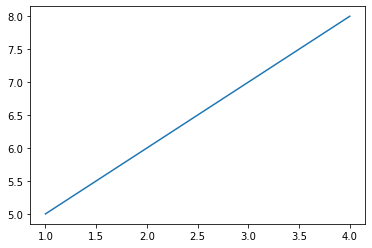

In [3]:
plt.plot([1,2,3,4], [5,6,7,8])
plt.savefig(c)

In [4]:
c.seek(0)
ipywidgets.Image(value=c.read(), format="png")

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\…

In [5]:
%matplotlib agg

In [6]:
import numpy as np

In [13]:
class MyWidget(traitlets.HasTraits):
    value = traitlets.Bytes()
    seed = traitlets.Int()
    count = traitlets.Int(100)
    
    @traitlets.observe("seed", "count")
    def _update_value(self, change):
        np.random.seed(change['new'])
        c = io.BytesIO()
        v = np.random.random(self.count * 2)
        plt.clf()
        plt.scatter(v[::2], v[1::2])
        plt.savefig(c)
        c.seek(0)
        self.value = c.read()

    def _ipython_display_(self):
        count_slider = ipywidgets.IntSlider(value = self.count, min = 1, max = 1000)
        seed_entry = ipywidgets.IntText(value = self.seed)
        traitlets.link((count_slider, 'value'), (self, 'count'))
        traitlets.link((seed_entry, 'value'), (self, 'seed'))
        im = ipywidgets.Image(format = 'png', width=512, height=512)
        traitlets.link((im, 'value'), (self, 'value'))
        display(ipywidgets.VBox([count_slider, seed_entry, im]))

In [14]:
mw = MyWidget(seed = 100)
mw